# Guided Capstone Step 6 Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [1]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib  inline

In [2]:
cd ~

/Users/gagibitz


In [3]:
cd Documents/springboard/springboard-git/springboard/GuidedCapstone/data

/Users/gagibitz/Documents/springboard/springboard-git/springboard/GuidedCapstone/data


In [4]:
df = pd.read_csv('step3_output.csv')
df.head()

,Name,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,cluster
0,Alyeska Resort,Alaska,3939,2500,250,1,0.0,0,2,2,...,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0,2
1,Eaglecrest Ski Area,Alaska,2600,1540,1200,0,0.0,0,0,0,...,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0,1
2,Hilltop Ski Area,Alaska,2090,294,1796,0,0.0,0,0,0,...,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0,1
3,Arizona Snowbowl,Arizona,11500,2300,9200,0,0.0,1,0,2,...,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0,2
4,Sunrise Park Resort,Arizona,11100,1800,9200,0,0.0,0,1,2,...,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0,2


## Fit Models with Training Data Set

**<font color='teal'> Using sklearn fit the model you cose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Best Model 

In [5]:
#Dropping name column and state column. Neither affect the final model. 
df.index = df.Name
df = df.drop(['Name', 'state'], axis=1)
df.head()

,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,cluster
Name,,,,,,,,,,,,,,,,,,,,,
Alyeska Resort,3939,2500,250,1,0.0,0,2,2,0,0,...,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0,2
Eaglecrest Ski Area,2600,1540,1200,0,0.0,0,0,0,0,4,...,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0,1
Hilltop Ski Area,2090,294,1796,0,0.0,0,0,0,1,0,...,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0,1
Arizona Snowbowl,11500,2300,9200,0,0.0,1,0,2,2,1,...,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0,2
Sunrise Park Resort,11100,1800,9200,0,0.0,0,1,2,3,1,...,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0,2


In [6]:
#Create a separate response variable dataframe.
resp_var = df[['AdultWeekend', 'AdultWeekday', 'daysOpenLastYear', 'projectedDaysOpen']]
resp_var.head()

#Load scikit scaling libraries.
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
X_unclean = df
y = df.AdultWeekend

In [7]:
#Create a separate response variable dataframe.
resp_var = df[['AdultWeekend', 'AdultWeekday', 'daysOpenLastYear', 'projectedDaysOpen']]
resp_var.head()

#Load scikit scaling libraries.
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
data = df.drop(['AdultWeekend', 'AdultWeekday', 'daysOpenLastYear', 'projectedDaysOpen'], axis=1)
data.head()
X = data
y = df.AdultWeekend
X_normalized = preprocessing.normalize(X)
X_normalized

array([[7.84782848e-01, 4.98085077e-01, 4.98085077e-02, ...,
        1.33287567e-01, 1.09578717e-01, 3.98468062e-04],
       [7.80018994e-01, 4.62011250e-01, 3.60008766e-01, ...,
        1.05002557e-01, 0.00000000e+00, 3.00007305e-04],
       [7.53717628e-01, 1.06025351e-01, 6.47692278e-01, ...,
        2.48835006e-02, 1.08189133e-02, 3.60630444e-04],
       ...,
       [7.70598833e-01, 1.55047486e-01, 6.15551348e-01, ...,
        2.96080494e-02, 1.08562848e-02, 1.97386996e-04],
       [7.37156703e-01, 7.55236609e-02, 6.71168857e-01, ...,
        1.90716315e-02, 0.00000000e+00, 7.62865262e-05],
       [7.45961008e-01, 8.63744325e-02, 6.59586575e-01, ...,
        1.17783317e-02, 0.00000000e+00, 7.85222113e-05]])

In [8]:
# Train, Test and Split the data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.25)

In [9]:
print(X_train)
print(X_test)

[[7.58201821e-01 1.17209943e-01 6.40991877e-01 ... 1.56768299e-02
  0.00000000e+00 1.46512429e-04]
 [7.92033961e-01 2.62378742e-01 5.29655220e-01 ... 9.23573170e-02
  3.91818921e-02 6.99676644e-04]
 [8.11266029e-01 3.09053725e-01 4.82896446e-01 ... 1.93158578e-02
  6.18107451e-02 3.86317157e-04]
 ...
 [7.95141979e-01 2.58421143e-01 5.36720836e-01 ... 9.14413276e-02
  1.59028396e-02 3.97570989e-04]
 [7.53169457e-01 2.79582485e-01 4.73586973e-01 ... 3.83854704e-02
  0.00000000e+00 1.66170868e-04]
 [7.99566270e-01 3.53529670e-01 4.46036600e-01 ... 1.23735384e-01
  5.24402344e-02 5.89216117e-04]]
[[4.97644808e-01 1.14138718e-01 3.83886553e-01 ... 0.00000000e+00
  0.00000000e+00 3.80462392e-04]
 [7.36768614e-01 6.53391099e-02 6.71429504e-01 ... 4.00853435e-02
  0.00000000e+00 1.00213359e-04]
 [8.12440243e-01 4.22017571e-01 3.90422672e-01 ... 1.80542276e-02
  5.41626829e-02 4.51355691e-04]
 ...
 [8.13653262e-01 4.03442391e-01 4.10210870e-01 ... 5.12763588e-02
  0.00000000e+00 4.10210870e-04]

In [10]:
# Time for modeling.
from sklearn import linear_model
from sklearn.metrics import explained_variance_score, mean_absolute_error
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

In [11]:
y_pred = model.predict(X_test)
y_pred_full = model.predict(X_normalized)
print(y_pred)

[-83.94966819  58.26162552  71.12714367  42.60672179  70.60586036
  80.45804262 102.76801201  57.02728431  58.41356579  68.81998081
  73.01152242  71.14500944  53.58492633  50.15794449  68.28833566
  73.0074072   11.58828015  17.30598095  38.32870762  58.25180448
  55.59688802  56.68461564  70.44882807  82.59637199  64.93073776
  49.0765426   57.18069684  37.84984077  82.48959905  63.04069782
  63.73753455  48.42827138  61.20676689  51.17157308  65.12897343
  54.83287622 119.35096926  62.4885517   89.24269238  67.85846513
  71.34942281  34.95057853  66.97824659  74.57572285  49.15331801
 100.32176796  71.77974109  52.83806731  32.52580241  64.41549292
  62.21530708  62.83057453  73.9379172   61.9725868   65.0136877
  57.3880055   52.98320192  65.20840536  72.30621636  54.79668628
  59.52968274  82.57149892  78.53619408  65.9370988   17.65094431
  57.84141506  54.87110144  66.40233279  51.29792419  94.57234697
  38.31234996  70.44477408  73.56882682 107.88144401  62.2452103
  68.8986194

In [12]:
final = df
final['AdultWeekendPredicted'] = y_pred_full
final['AdultWeekend'] = df.AdultWeekend
final.head()
final.loc['Whitefish Mountain Resort']

summit_elev              6817.000000
vertical_drop            2353.000000
base_elev                4464.000000
trams                       0.000000
fastEight                   0.000000
fastSixes                   0.000000
fastQuads                   3.000000
quad                        2.000000
triple                      6.000000
double                      0.000000
surface                     3.000000
total_chairs               14.000000
Runs                      105.000000
TerrainParks                4.000000
LongestRun_mi               3.300000
SkiableTerrain_ac        3000.000000
Snow Making_ac            600.000000
daysOpenLastYear          123.000000
yearsOpen                  72.000000
averageSnowfall           333.000000
AdultWeekday               81.000000
AdultWeekend               81.000000
projectedDaysOpen         123.000000
NightSkiing_ac            600.000000
cluster                     2.000000
AdultWeekendPredicted      81.961544
Name: Whitefish Mountain Resort, dtype

In [13]:
explained_variance_score(
    y_test,
    y_pred,
    sample_weight=None,
    multioutput='uniform_average',
)

-0.26615505253441807

In [14]:
mean_absolute_error(
    y_test,
    y_pred,
    sample_weight=None,
    multioutput='uniform_average',
)

15.777983518369073

## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

In [15]:
print(df.loc['Whitefish Mountain Resort'])


summit_elev              6817.000000
vertical_drop            2353.000000
base_elev                4464.000000
trams                       0.000000
fastEight                   0.000000
fastSixes                   0.000000
fastQuads                   3.000000
quad                        2.000000
triple                      6.000000
double                      0.000000
surface                     3.000000
total_chairs               14.000000
Runs                      105.000000
TerrainParks                4.000000
LongestRun_mi               3.300000
SkiableTerrain_ac        3000.000000
Snow Making_ac            600.000000
daysOpenLastYear          123.000000
yearsOpen                  72.000000
averageSnowfall           333.000000
AdultWeekday               81.000000
AdultWeekend               81.000000
projectedDaysOpen         123.000000
NightSkiing_ac            600.000000
cluster                     2.000000
AdultWeekendPredicted      81.961544
Name: Whitefish Mountain Resort, dtype

**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [16]:
print(df.loc['Whitefish Mountain Resort', 'AdultWeekendPredicted'])

81.96154447766006


**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [17]:
print(df.loc['Whitefish Mountain Resort', 'AdultWeekend'])

81.0


**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

NameError: name 'ac' is not defined

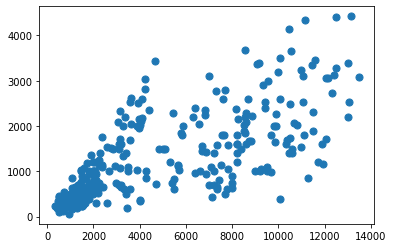

In [18]:
plt.scatter(df['summit_elev'], df['vertical_drop'], s=50, cmap='viridis', label ='clusters')
plt.scatter(ac['summit_elev'], ac['vertical_drop'], c='black', s=100)
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')
plt.savefig('figures/fig1.png',bbox_inches='tight')

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and python scripts you have created and clean them n=up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model out a callable object using pickle for future use in a data pipeline.**<font color='teal'> Run the example code below to save out your callable model, notice we save it in the models folder we created in our previous guided capstone.</font>** 

In [ ]:
cd ..

In [ ]:
import pickle
s = pickle.dumps(model)
from joblib import dump, load
dump(model, 'models/regression_model_adultweekend.joblib') 

## Finalize Documentation

For model documentation we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file then upload it to your github repository.</font>** 